In [1]:
from tesser import util
from tesser import fit
from tesser import network
from tesser import sr
from tesser import rsa
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
#anytime you make a figure, it'll show up, and can make subplots

#if laptop:
#data_dir = '/Users/athulapudhiyidath/Dropbox/Experiments/tesser_successor/data'

#if work:
data_dir = '/Users/athula/Dropbox/Experiments/tesser_successor/data'

subject = 100

# load structure learning and induction data for one subject
group_load = util.load_group(data_dir, subject)
df_group = pd.DataFrame(group_load)
df_group.columns = np.arange(len(df_group.columns))
df_group

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,11.0,10.0,6.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,16.0,15.0,17.0,0.0,20.0,19.0,21.0,0.0,0.0,3.0,13.0,2.0,14.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,8.0,18.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#find the coordinates of each of the numbers
#save the number + respective coordinates (row, col) into a array

all_num = []
all_row = []
all_col = []
for n in range(1, 22, 1):
    this_row_col = np.where(df_group == n) #row [0], column [1]
    this_row = np.int(this_row_col[0])
    this_col = np.int(this_row_col[1])
    all_num.append(n)
    all_row.append(this_row)
    all_col.append(this_col)
    
    
all_num_row_col = pd.DataFrame(list(zip(all_num, all_row, all_col)), columns =['node', 'row', 'col'])
print(all_num_row_col)

all_row_col = pd.DataFrame(list(zip(all_row, all_col)), columns =['row', 'col'])
print(all_row_col)

    node  row  col
0      1    8   14
1      2    5   14
2      3    5   12
3      4    8   13
4      5    8   12
5      6    2   15
6      7    8    5
7      8    8    3
8      9    8    2
9     10    2   14
10    11    2   13
11    12    2   12
12    13    5   13
13    14    5   15
14    15    5    4
15    16    5    3
16    17    5    5
17    18    8    4
18    19    5    8
19    20    5    7
20    21    5    9
    row  col
0     8   14
1     5   14
2     5   12
3     8   13
4     8   12
5     2   15
6     8    5
7     8    3
8     8    2
9     2   14
10    2   13
11    2   12
12    5   13
13    5   15
14    5    4
15    5    3
16    5    5
17    8    4
18    5    8
19    5    7
20    5    9


In [3]:
all_row_col_array = all_row_col.values
print(all_row_col_array)

[[ 8 14]
 [ 5 14]
 [ 5 12]
 [ 8 13]
 [ 8 12]
 [ 2 15]
 [ 8  5]
 [ 8  3]
 [ 8  2]
 [ 2 14]
 [ 2 13]
 [ 2 12]
 [ 5 13]
 [ 5 15]
 [ 5  4]
 [ 5  3]
 [ 5  5]
 [ 8  4]
 [ 5  8]
 [ 5  7]
 [ 5  9]]


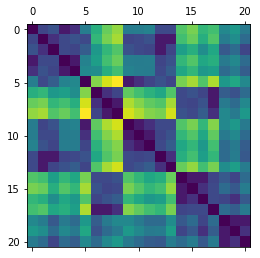

In [4]:
dist_bw_sq = squareform(pdist(all_row_col_array, "euclidean"))
plt.matshow(dist_bw_sq)

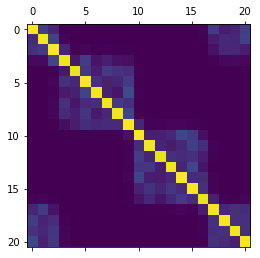

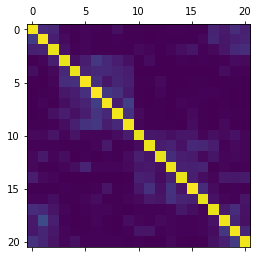

In [5]:
#getting SR matricies from initial encoding task
df_allruns = util.load_struct(data_dir, subject)
df_allruns.head()
M_allruns = sr.explore_runs(df_allruns, 'persist',0.5,0.1)
#gamma = 0.5
#alpha = 0.1

#last run of Part 
final_run_part1_sr =  M_allruns[1, 5]
plt.matshow(final_run_part1_sr)

final_run_part2_sr = M_allruns[2, 6]
plt.matshow(final_run_part2_sr)

In [6]:
#doing Pearson correlation b/w Eucledian distance and SR matrix 
#don't think this is doing the right thing
pearson = np.corrcoef(dist_bw_sq, final_run_part1_sr)
pearson[0,1]

pearson = np.corrcoef(dist_bw_sq, final_run_part2_sr)
pearson[0,1]

0.8932198870085264

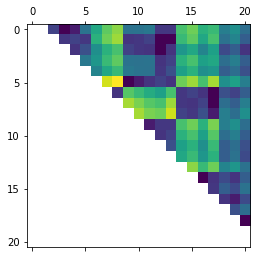

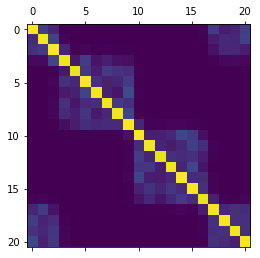

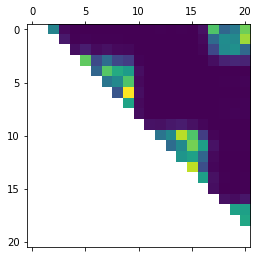

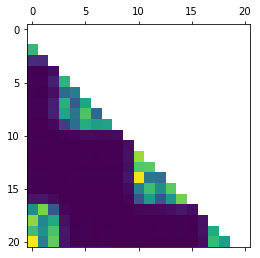

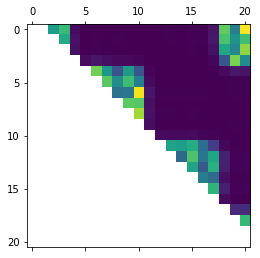

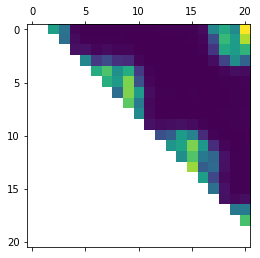

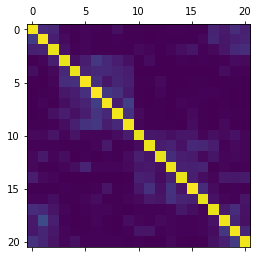

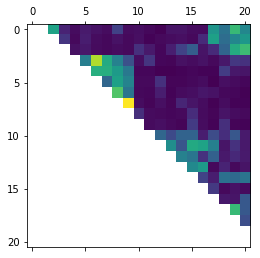

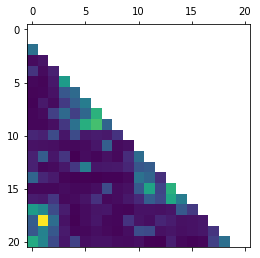

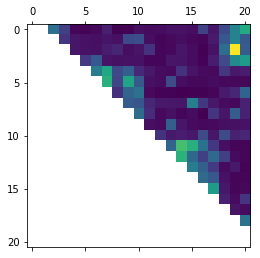

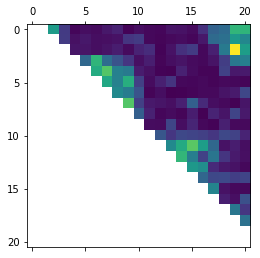

In [7]:
#getting the first halves of the matrix and averaging (squareform)

##############################
#from the Eucledian distance matrix
##############################

#the original matrix:
#print(dist_bw_sq)
#plt.matshow(dist_bw_sq)
#dist_bw_sq.shape #21 x 21

#the upperhalf of the matrix:
dist_bw_sq_upper=np.triu(dist_bw_sq)
#make the half 0s to NaNs
dist_bw_sq_upper[np.tril_indices(dist_bw_sq_upper.shape[0], 1)] = np.nan
plt.matshow(dist_bw_sq_upper)

#from the SR matrix, get the first half, above the diagonal, averaged across the two
#plt.matshow(dist_bw_sq_upper)
#dist_bw_sq_upper.shape

##############################
#from the SR distance matrix
##############################

#######
#PART 1
#######
final_run_part1_sr =  M_allruns[1, 5]
#plt.matshow(final_run_part1_sr)

#take upper SR
final_run_part1_sr_upper = np.triu(final_run_part1_sr)
#make the half 0s to NaNs
final_run_part1_sr_upper[np.tril_indices(final_run_part1_sr_upper.shape[0], 1)] = np.nan

#take lower SR
final_run_part1_sr_lower = np.tril(final_run_part1_sr)
#make the half 0s to NaNs
final_run_part1_sr_lower[np.triu_indices(final_run_part1_sr_lower.shape[0], -1)] = np.nan

#flip lower SR to match upper SR
final_run_part1_sr_lower_flip = np.flip(final_run_part1_sr_lower)

plt.matshow(final_run_part1_sr)
plt.matshow(final_run_part1_sr_upper)
plt.matshow(final_run_part1_sr_lower)
plt.matshow(final_run_part1_sr_lower_flip)

final_run_part1_avg_sr = (final_run_part1_sr_upper + final_run_part1_sr_lower_flip)/2
plt.matshow(final_run_part1_avg_sr)

#######
#PART 2
#######
final_run_part2_sr = M_allruns[2, 6]
#plt.matshow(final_run_part2_sr)

#take upper SR
final_run_part2_sr_upper = np.triu(final_run_part2_sr)
#make the half 0s to NaNs
final_run_part2_sr_upper[np.tril_indices(final_run_part2_sr_upper.shape[0], 1)] = np.nan

#take lower SR
final_run_part2_sr_lower = np.tril(final_run_part2_sr)
#make the half 0s to NaNs
final_run_part2_sr_lower[np.triu_indices(final_run_part2_sr_lower.shape[0], -1)] = np.nan

#flip lower SR to match upper SR
final_run_part2_sr_lower_flip = np.flip(final_run_part2_sr_lower)

plt.matshow(final_run_part2_sr)
plt.matshow(final_run_part2_sr_upper)
plt.matshow(final_run_part2_sr_lower)
plt.matshow(final_run_part2_sr_lower_flip)

final_run_part2_avg_sr = (final_run_part2_sr_upper + final_run_part2_sr_lower_flip)/2
plt.matshow(final_run_part2_avg_sr)

In [8]:
#save out the linear regression b/w Eucledian distance and SR matrix 

###########
#Dist Matrix
###########
#flatten the 21x21 Eucledian matrix 
dist_bw_sq_upper

#remove NaNs first 
dist_bw_sq_upper_nanrem = dist_bw_sq_upper[~np.isnan(dist_bw_sq_upper)]

#flatten the data 
dist_bq_sq_upper_flat = dist_bw_sq_upper_nanrem.flatten()
#print(dist_bq_sq_upper_flat)
#print(dist_bq_sq_upper_flat.shape)

###########
#SR1 Matrix
###########
#flatten the 21x21 averaged SR matrix 
final_run_part1_avg_sr

#remove NaNs first
final_run_part1_avg_sr_nanrem = final_run_part1_avg_sr[~np.isnan(final_run_part1_avg_sr)]

final_run_part1_avg_sr_flat = final_run_part1_avg_sr_nanrem.flatten()
#print(final_run_part1_avg_sr_flat.shape)

###########
#SR2 Matrix
###########
#flatten the 21x21 averaged SR matrix 
final_run_part2_avg_sr

#remove NaNs first
final_run_part2_avg_sr_nanrem = final_run_part2_avg_sr[~np.isnan(final_run_part2_avg_sr)]

final_run_part2_avg_sr_flat = final_run_part2_avg_sr_nanrem.flatten()
#print(final_run_part2_avg_sr_flat.shape)


In [9]:
#put into the linregress model: Dist. vs. SR1
stats.linregress(dist_bq_sq_upper_flat, final_run_part1_avg_sr_flat)

LinregressResult(slope=0.0017797559764878995, intercept=0.0221134693211136, rvalue=0.11213296515118237, pvalue=0.12348517023499314, stderr=0.0011502720091267236)

In [10]:
#put into the linregress model: Dist. vs. SR2
stats.linregress(dist_bq_sq_upper_flat, final_run_part2_avg_sr_flat)

LinregressResult(slope=0.0009473079630697569, intercept=0.03440797637447099, rvalue=0.08734992909300213, pvalue=0.2307682068607864, stderr=0.0007879279706549048)

In [11]:
#can compare models: i.e. compare plain adj matrix to inference vs. SR matrix to inference, 
#and see how much the latter might give predictions above and beyond what we have 
#SR most closely reflects adjaceny matrix when the gamma = 0



In [12]:
#maximum likelihood of the alpha and gamma values for an SR that best fit the person's grouping data and gives the highest correlation
